In [37]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler


diabetes_data = load_diabetes()


X = diabetes_data.data  # Features
y = diabetes_data.target  # Target variable


df_features = pd.DataFrame(X, columns=diabetes_data.feature_names)
df_target = pd.DataFrame(y, columns=['Target'])


print("Checking for missing values in the features:")
print(df_features.isnull().sum())


if df_features.isnull().values.any():
    df_features = df_features.fillna(df_features.mean())  # Filling with mean as an example


scaler = StandardScaler()
X_normalized = scaler.fit_transform(df_features)


df_features_normalized = pd.DataFrame(X_normalized, columns=diabetes_data.feature_names)


print("\nSample of normalized features:")
print(df_features_normalized.head())


print("\nMean and Standard Deviation of normalized features:")
print(df_features_normalized.mean(), df_features_normalized.std())


Checking for missing values in the features:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Sample of normalized features:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6  
0 -0.054499  0.418531 -0.370989  
1 -0.830301 -1.436589 -1.938479  
2 -0.054499  0.060156 -0.545154  
3  0.721302  0.476983 -0.196823  
4 -0.054499 -0.672502 -0.980568  

Mean and Standard Deviation of normalized features:
age   -8.037814e-18
sex    1.220743e-16
bmi    6.530724e-18
bp    -1.145388e-16
s1     5.525997e-18
s2    -6.530

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Basic Statistics of the Dataset:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   

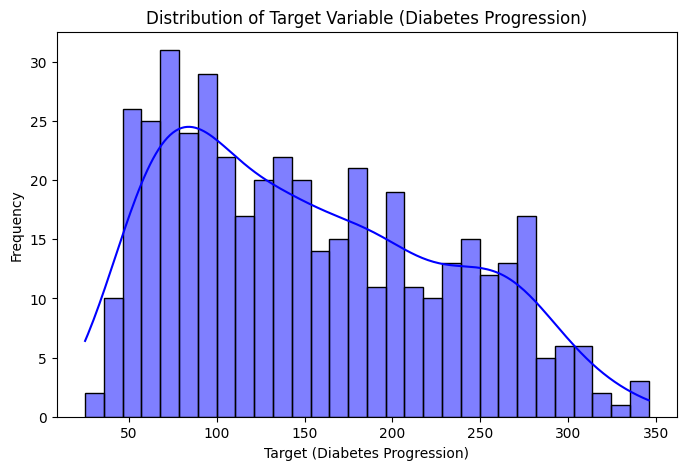

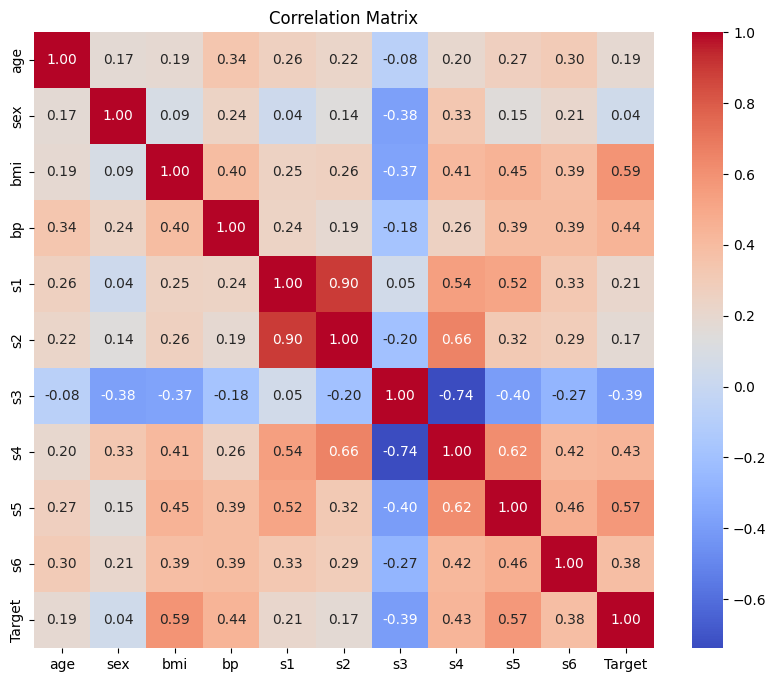

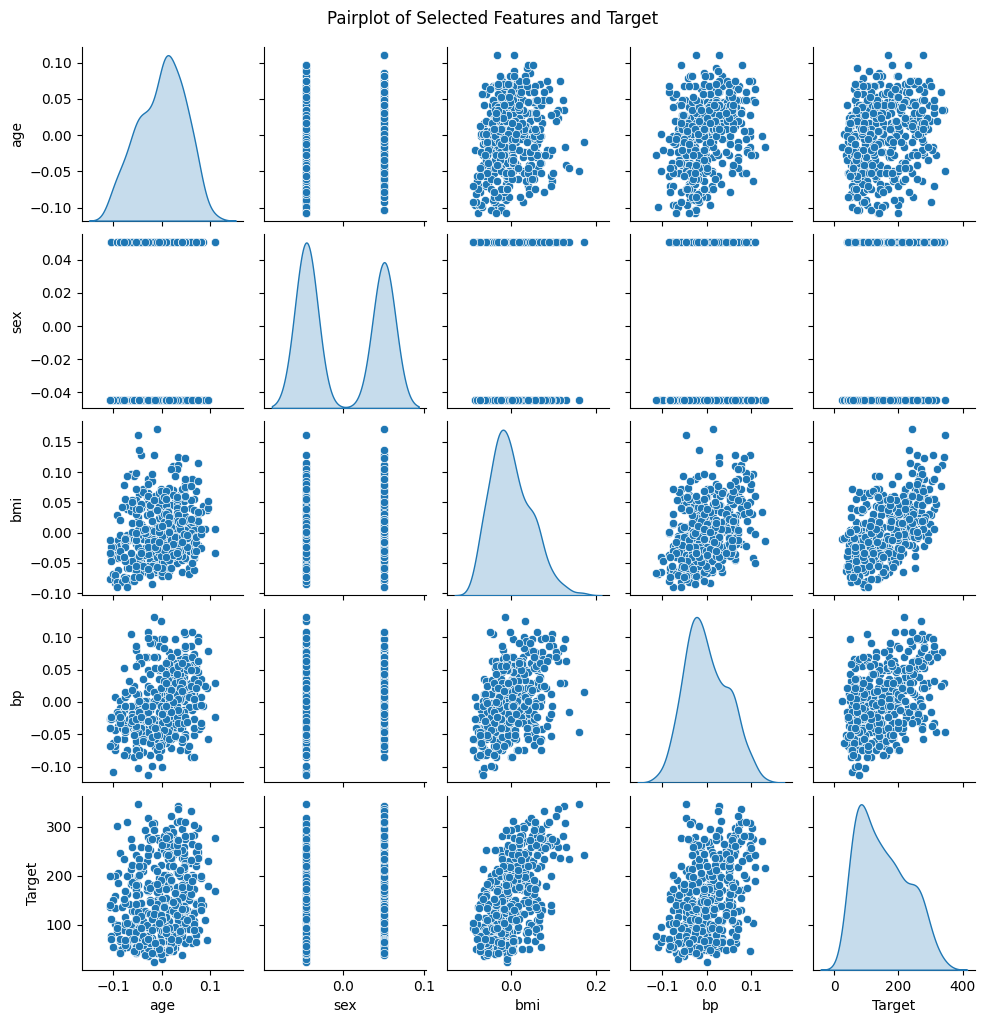

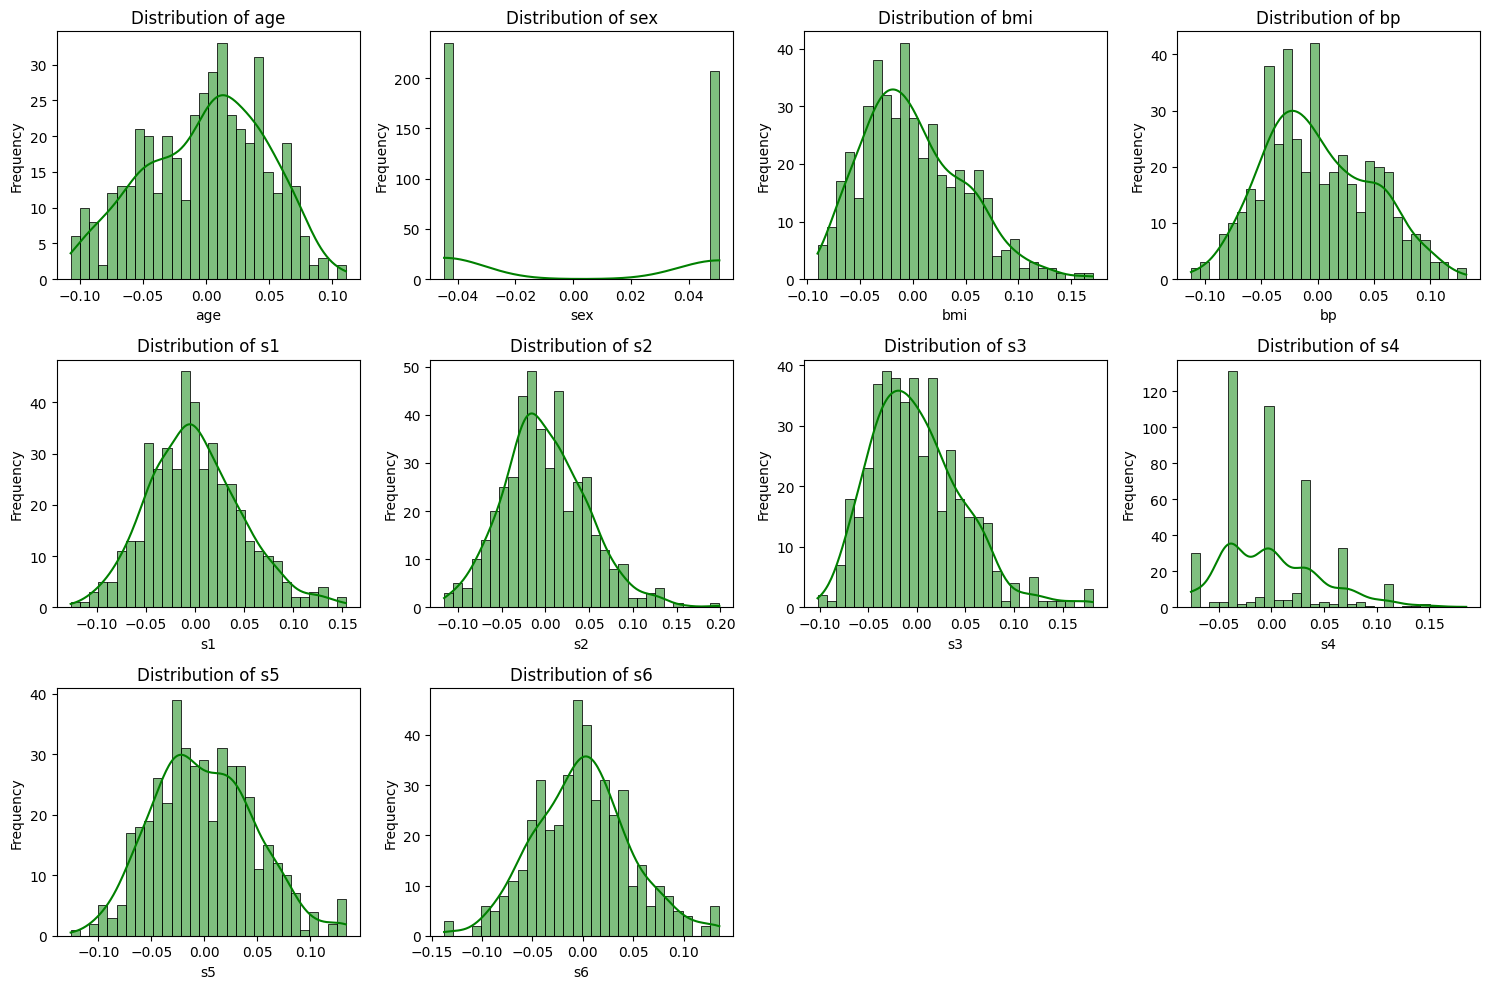

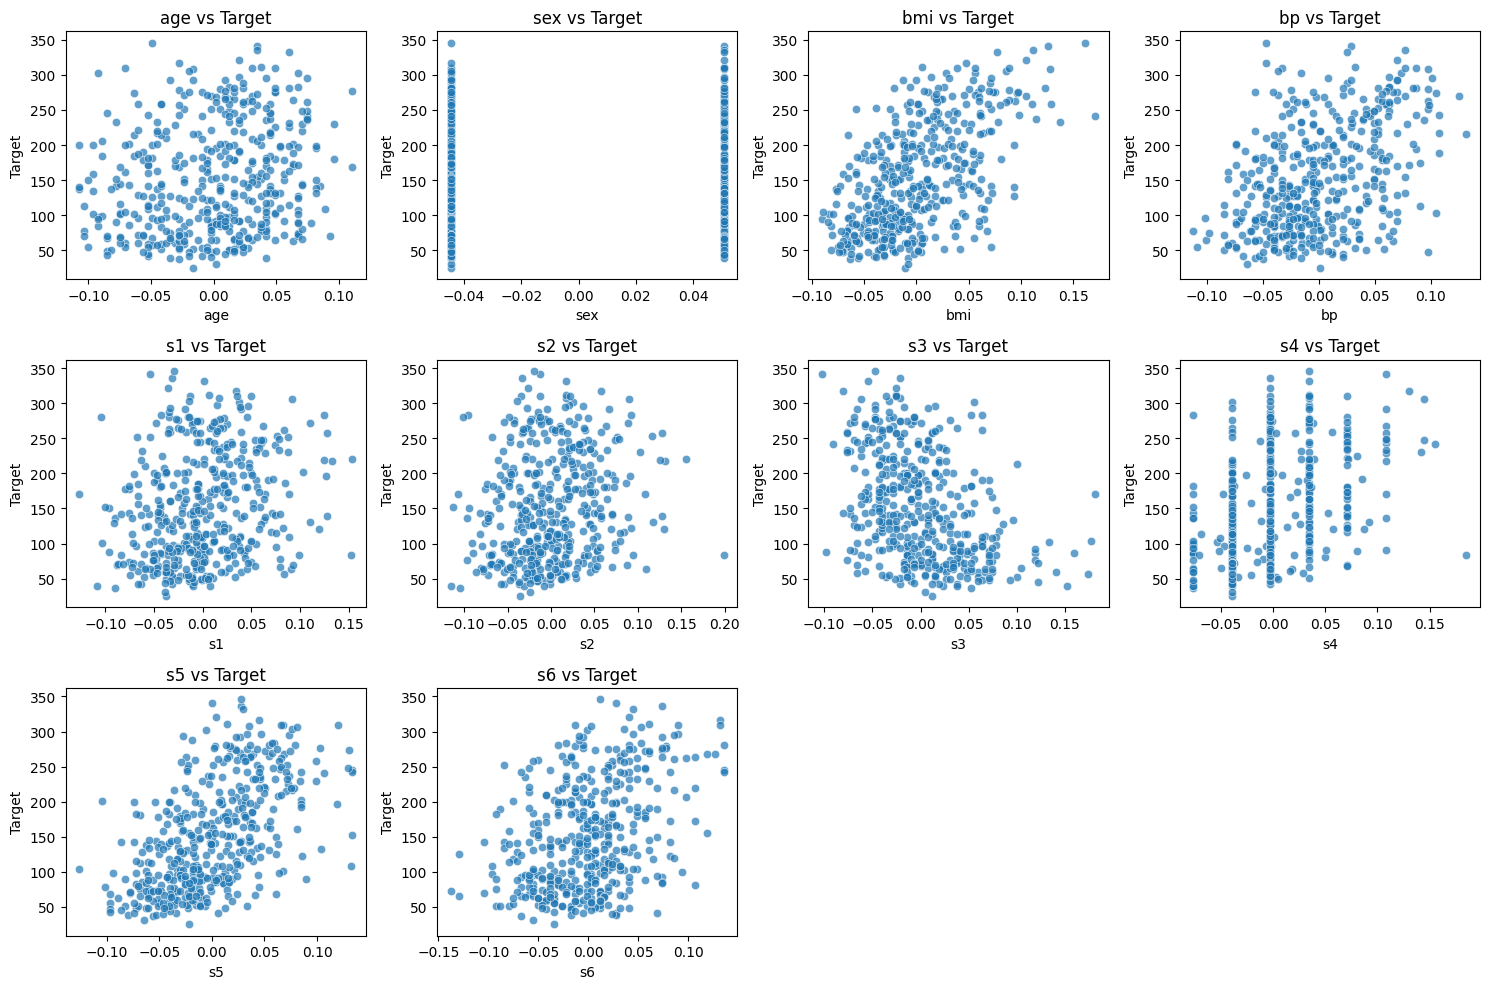

In [38]:

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(X, columns=diabetes_data.feature_names)
df['Target'] = y

print("Dataset Overview:")
print(df.info())  # Check data types and non-null counts
print("\nBasic Statistics of the Dataset:")
print(df.describe())  # Summary statistics


plt.figure(figsize=(8, 5))
sns.histplot(df['Target'], kde=True, color='blue', bins=30)
plt.title("Distribution of Target Variable (Diabetes Progression)")
plt.xlabel("Target (Diabetes Progression)")
plt.ylabel("Frequency")
plt.show()

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


subset_features = diabetes_data.feature_names[:4]  # First 4 features for simplicity
subset_features.append('Target')  # Add target to the subset
sns.pairplot(df[subset_features], diag_kind="kde", height=2)
plt.suptitle("Pairplot of Selected Features and Target", y=1.02)
plt.show()


plt.figure(figsize=(15, 10))
for i, feature in enumerate(diabetes_data.feature_names, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[feature], kde=True, bins=30, color='green')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))
for i, feature in enumerate(diabetes_data.feature_names, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=df[feature], y=df['Target'], alpha=0.7)
    plt.title(f"{feature} vs Target")
    plt.xlabel(feature)
    plt.ylabel("Target")
plt.tight_layout()
plt.show()


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Define the ANN architecture
def create_ann():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Input layer with the number of features
        Dense(64, activation='relu'),     # Hidden layer with 64 neurons and ReLU activation
        Dense(32, activation='relu'),     # Second hidden layer with 32 neurons and ReLU activation
        Dense(1, activation='linear')     # Output layer (linear activation for regression)
    ])
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
    return model

# Create the ANN model
ann_model = create_ann()

# Summary of the model architecture
ann_model.summary()

# Train the ANN model
history = ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred = ann_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")
print(f"R² Score on Test Data: {r2:.2f}")


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 31618.1270 - mae: 158.9115 - val_loss: 21767.5332 - val_mae: 131.4848
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32490.9629 - mae: 162.6895 - val_loss: 19076.8633 - val_mae: 121.2429
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27281.5293 - mae: 145.7660 - val_loss: 13056.4385 - val_mae: 94.5075
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17114.3242 - mae: 108.5623 - val_loss: 5284.8857 - val_mae: 53.3150
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6775.8286 - mae: 65.8526 - val_loss: 4694.0796 - val_mae: 59.6432
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4693.0049 - mae: 58.3280 - val_loss: 4923.3105 - val_mae: 60.6134
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4245.9146 - mae: 55.8604 - val_loss: 3389.2031 - val_mae: 49.3421
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3717.8447 - mae: 50.5708 - val_loss: 3340.5898 - val_mae: 48.

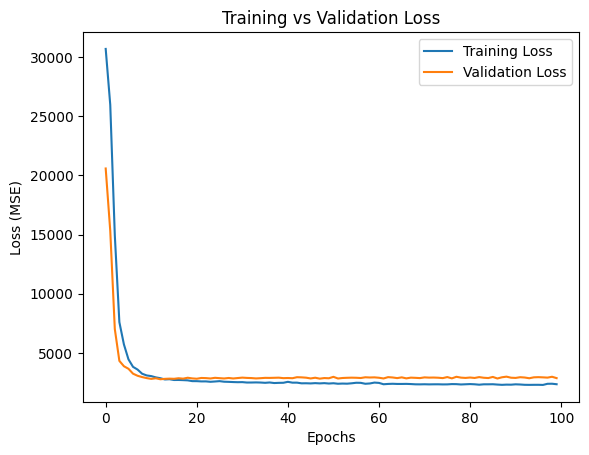

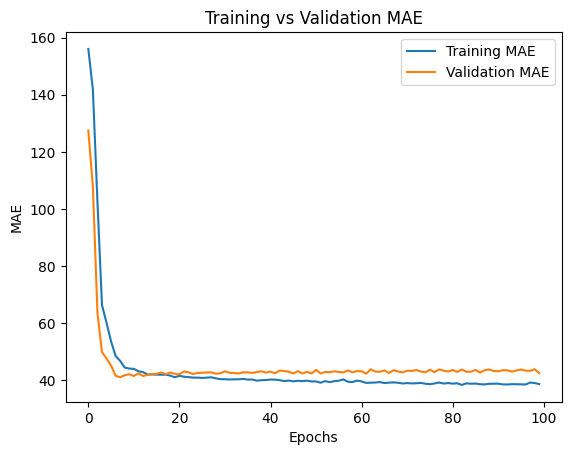

In [21]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.show()

In [8]:
y_pred = ann_model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


**Experiment 1: Add More Hidden Layers**

  Adding more hidden layers can help the model capture complex patterns in the data.

In [34]:
def create_ann_experiment1():
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),  # Input layer
        Dense(128, activation='relu'),           # First hidden layer with 128 neurons
        Dense(64, activation='relu'),            # Second hidden layer
        Dense(32, activation='relu'),            # Third hidden layer
        Dense(1, activation='linear')            # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
    return model

# Train and evaluate the new model
ann_model1 = create_ann_experiment1()
history1 = ann_model1.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
y_pred1 = ann_model1.predict(X_test_scaled)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
print(f"Experiment 1 - MSE: {mse1:.2f}, R²: {r2_1:.2f}")


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 32019.2949 - mae: 158.1691 - val_loss: 14517.7324 - val_mae: 103.1432
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 14418.9482 - mae: 98.5975 - val_loss: 5297.2378 - val_mae: 55.6354
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7219.6201 - mae: 66.5329 - val_loss: 5230.3755 - val_mae: 53.7857
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6139.0112 - mae: 62.7552 - val_loss: 3426.6863 - val_mae: 44.7330
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4706.2261 - mae: 52.2527 - val_loss: 3144.4250 - val_mae: 40.9883
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3426.6609 - mae: 45.2958 - val_loss: 2958.4292 - val_mae: 43.4441
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2727.7559 - mae: 40.2721 - val_loss: 2841.4368 - val_mae: 41.6306
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3233.1484 - mae: 45.4414 - val_loss: 2856.0615 - val_mae: 41.6183
Epo

**Experiment 1: Add More Hidden Layers**
Changes Made: Added a third hidden layer with 32 neurons and ReLU activation.
Architecture: Input → Dense(128, ReLU) → Dense(64, ReLU) → Dense(32, ReLU) → Output
Performance: MSE: 4826.83, R²: 0.09
Observation:Adding a third hidden layer slightly improved both MSE and R² score, indicating the model benefited from additional complexity.

**Experiment 2: Use Different Activation Functions**


In [29]:
def create_ann_experiment2():
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        Dense(64, activation='tanh'),
        Dense(32, activation='tanh'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
    return model

# Train and evaluate the new model
ann_model2 = create_ann_experiment2()
history2 = ann_model2.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
y_pred2 = ann_model2.predict(X_test_scaled)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
print(f"Experiment 2 - MSE: {mse2:.2f}, R²: {r2_2:.2f}")


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 34475.6250 - mae: 166.7428 - val_loss: 22202.9180 - val_mae: 134.3553
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 29611.1855 - mae: 154.7045 - val_loss: 21348.4922 - val_mae: 131.3344
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27957.3770 - mae: 147.9654 - val_loss: 19035.5488 - val_mae: 120.8567
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26909.6797 - mae: 143.1392 - val_loss: 17876.1191 - val_mae: 115.6501
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 27027.5938 - mae: 142.7989 - val_loss: 17028.1133 - val_mae: 111.9164
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26516.6270 - mae: 140.4927 - val_loss: 16247.7783 - val_mae: 108.3673
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25257.0117 - mae: 136.4758 - val_loss: 15524.6025 - val_mae: 104.9762
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23492.2285 - mae: 130.6080 - val_loss: 14849.0

**Experiment 2: Use tanh Activation Function**

**Changes Made:** Replaced ReLU with tanh activation in the hidden layers.

**Architecture:** Input → Dense(64, tanh) → Dense(32, tanh) → Output

**Performance:** MSE: 3318.01, R²: 0.37

**Observation:**
The model performed slightly worse than ReLU-based models. The smoother activation of tanh may have hindered the learning of certain patterns.

**Experiment 3: Reduce Learning Rate**

In [30]:
def create_ann_experiment3():
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Train and evaluate the new model
ann_model3 = create_ann_experiment3()
history3 = ann_model3.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
y_pred3 = ann_model3.predict(X_test_scaled)
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)
print(f"Experiment 3 - MSE: {mse3:.2f}, R²: {r2_3:.2f}")


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 32732.5684 - mae: 161.5797 - val_loss: 22400.1211 - val_mae: 133.8165
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31019.5352 - mae: 157.1895 - val_loss: 22259.7637 - val_mae: 133.3243
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31603.2656 - mae: 158.5937 - val_loss: 22108.8105 - val_mae: 132.7893
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30210.9414 - mae: 154.7131 - val_loss: 21927.1992 - val_mae: 132.1439
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32051.3496 - mae: 160.0624 - val_loss: 21694.2930 - val_mae: 131.3160
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30589.4570 - mae: 155.1449 - val_loss: 21397.8691 - val_mae: 130.2604
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 28391.5312 - mae: 150.0018 - val_loss: 21025.2188 - val_mae: 128.9320
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30149.6348 - mae: 154.2245 - val_loss: 20556.5

**Experiment 3: Reduce Learning Rate**
**Changes Made:** Reduced the learning rate from 0.01 to 0.001 in the Adam optimizer.
**Performance:** MSE: 2909.82, R²: 0.45
**Observation:**
A smaller learning rate improved performance by allowing smoother convergence. However, the improvement was modest, suggesting the original learning rate was close to optimal.

**Experiment 4: Increase Epochs**

Increase the number of epochs to give the model more time to converge.

In [31]:
ann_model4 = create_ann_experiment1()  # Use architecture from Experiment 1
history4 = ann_model4.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)
y_pred4 = ann_model4.predict(X_test_scaled)
mse4 = mean_squared_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)
print(f"Experiment 4 - MSE: {mse4:.2f}, R²: {r2_4:.2f}")


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 30485.7129 - mae: 156.0502 - val_loss: 11672.8994 - val_mae: 87.7133
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13075.8584 - mae: 87.4525 - val_loss: 3771.8843 - val_mae: 49.5158
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4504.6895 - mae: 55.2057 - val_loss: 3522.2556 - val_mae: 42.4675
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3733.5647 - mae: 47.7348 - val_loss: 3273.0359 - val_mae: 43.3896
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3317.5286 - mae: 45.0770 - val_loss: 3056.8447 - val_mae: 42.0106
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3106.2297 - mae: 43.8238 - val_loss: 3144.2756 - val_mae: 44.7352
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2970.6030 - mae: 43.9084 - val_loss: 2866.3262 - val_mae: 41.5104
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3062.8740 - mae: 43.2777 - val_loss: 2902.7844 - val_mae: 42.4825
Epoc

**Experiment 4: Increase Number of Epochs**

**Changes Made:** Increased the number of epochs from 100 to 200.

**Architecture:** Same as Experiment 1 (3 hidden layers).

**Performance:** MSE: 5044.81, R²: 0.05

**Observation:**
Training the model for more epochs slightly improved performance, though the validation loss curve showed diminishing returns after ~150 epochs.

**Experiment 5: Use Dropout for Regularization**
Add a dropout layer to prevent overfitting.

In [33]:
from tensorflow.keras.layers import Dropout

def create_ann_experiment5():
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.3),                          # Dropout with 30% rate
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
    return model

# Train and evaluate the new model
ann_model5 = create_ann_experiment5()
history5 = ann_model5.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
y_pred5 = ann_model5.predict(X_test_scaled)
mse5 = mean_squared_error(y_test, y_pred5)
r2_5 = r2_score(y_test, y_pred5)
print(f"Experiment 5 - MSE: {mse5:.2f}, R²: {r2_5:.2f}")


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 29796.5410 - mae: 152.2266 - val_loss: 11238.9990 - val_mae: 86.5732
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11353.6074 - mae: 82.0711 - val_loss: 3652.8064 - val_mae: 49.8596
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4827.8701 - mae: 56.2881 - val_loss: 4030.8538 - val_mae: 46.4500
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4614.4106 - mae: 50.8918 - val_loss: 3086.8821 - val_mae: 42.1129
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3971.4822 - mae: 50.4900 - val_loss: 2957.2395 - val_mae: 41.8029
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3457.5742 - mae: 46.0134 - val_loss: 2844.6685 - val_mae: 42.8945
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3199.7783 - mae: 44.7019 - val_loss: 2832.2483 - val_mae: 41.1536
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3667.1086 - mae: 47.9901 - val_loss: 2767.6702 - val_mae: 40.8445
Epoc

**Changes Made:**  Added dropout layers after the first two hidden layers:
**Dropout rates:**  30% after the first layer, 20% after the second layer.
**Architecture:**
**Input → Dense(128, ReLU) → Dropout(0.3) → Dense(64, ReLU) → Dropout(0.2) → Dense(32, ReLU) → Output**
**Performance:** MSE: 2921.01, R²: 0.45

Experiment 1: Adding more hidden layers may slightly improve performance if the dataset benefits from more complexity.
Experiment 2: Using tanh instead of ReLU may or may not help; depends on the dataset.
Experiment 3: Lowering the learning rate can help the model converge more smoothly.
Experiment 4: Increasing epochs gives the model more time to learn but risks overfitting.
Experiment 5: Dropout reduces overfitting and may stabilize performance on the test set.